In [1]:
from Binaries import *

/tmp/ipykernel_1007843/2533348204.py:22: RuntimeWarning: divide by zero encountered in true_divide
  y_err = np.clip(1/(hits + misses)**2 * np.sqrt( hits**3 + misses**3 - 2 * np.sqrt((hits * misses)**3) ), 1e-5, 1)
/tmp/ipykernel_1007843/2533348204.py:22: RuntimeWarning: invalid value encountered in multiply
  y_err = np.clip(1/(hits + misses)**2 * np.sqrt( hits**3 + misses**3 - 2 * np.sqrt((hits * misses)**3) ), 1e-5, 1)
/tmp/ipykernel_1007843/2533348204.py:28: RuntimeWarning: invalid value encountered in true_divide
  x, y = spd - 50, hits / (hits + misses)


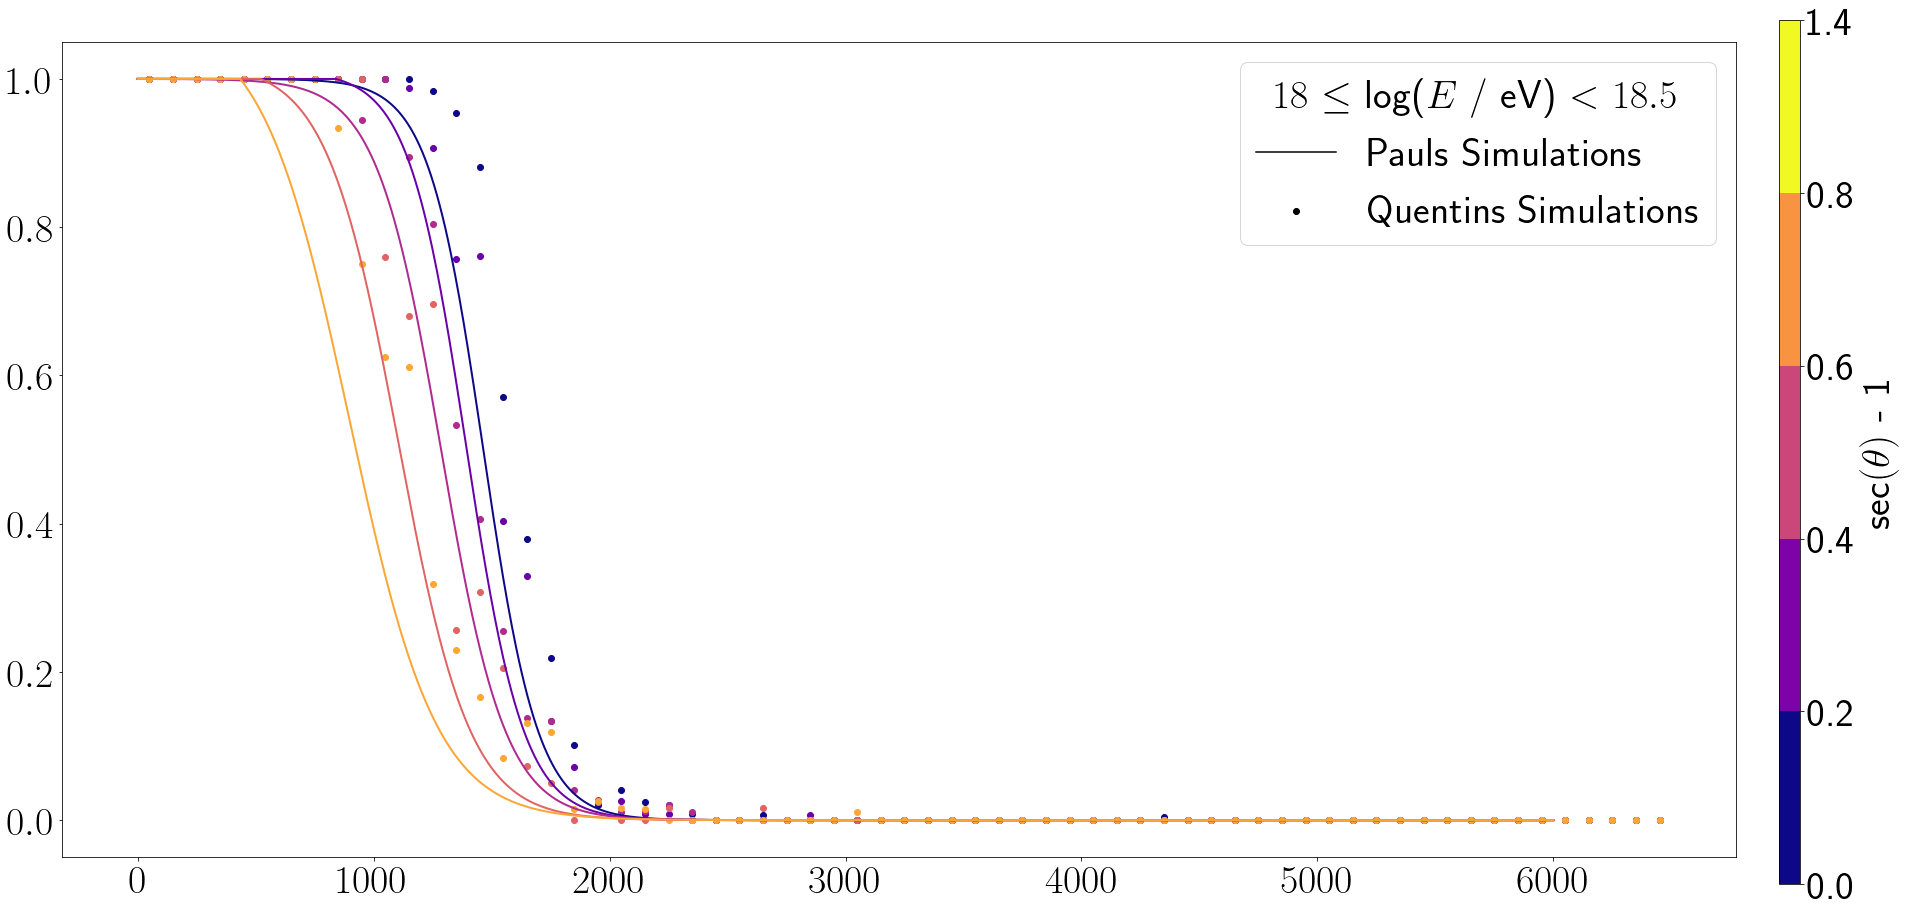

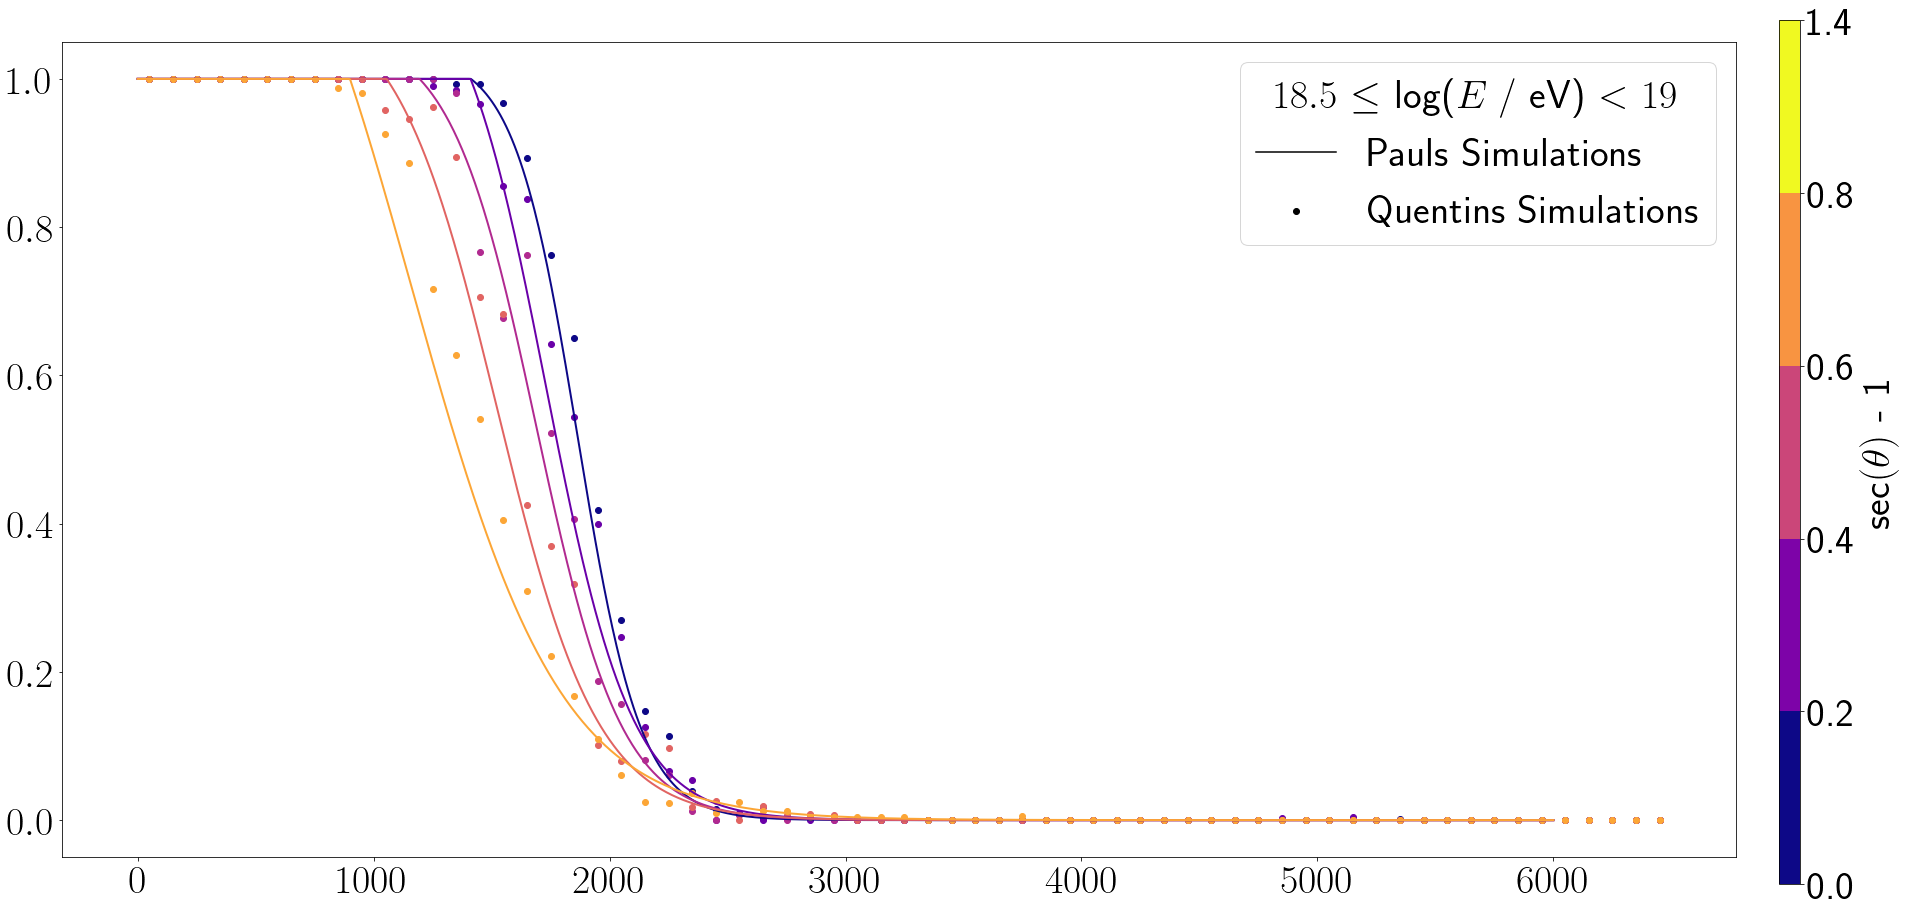

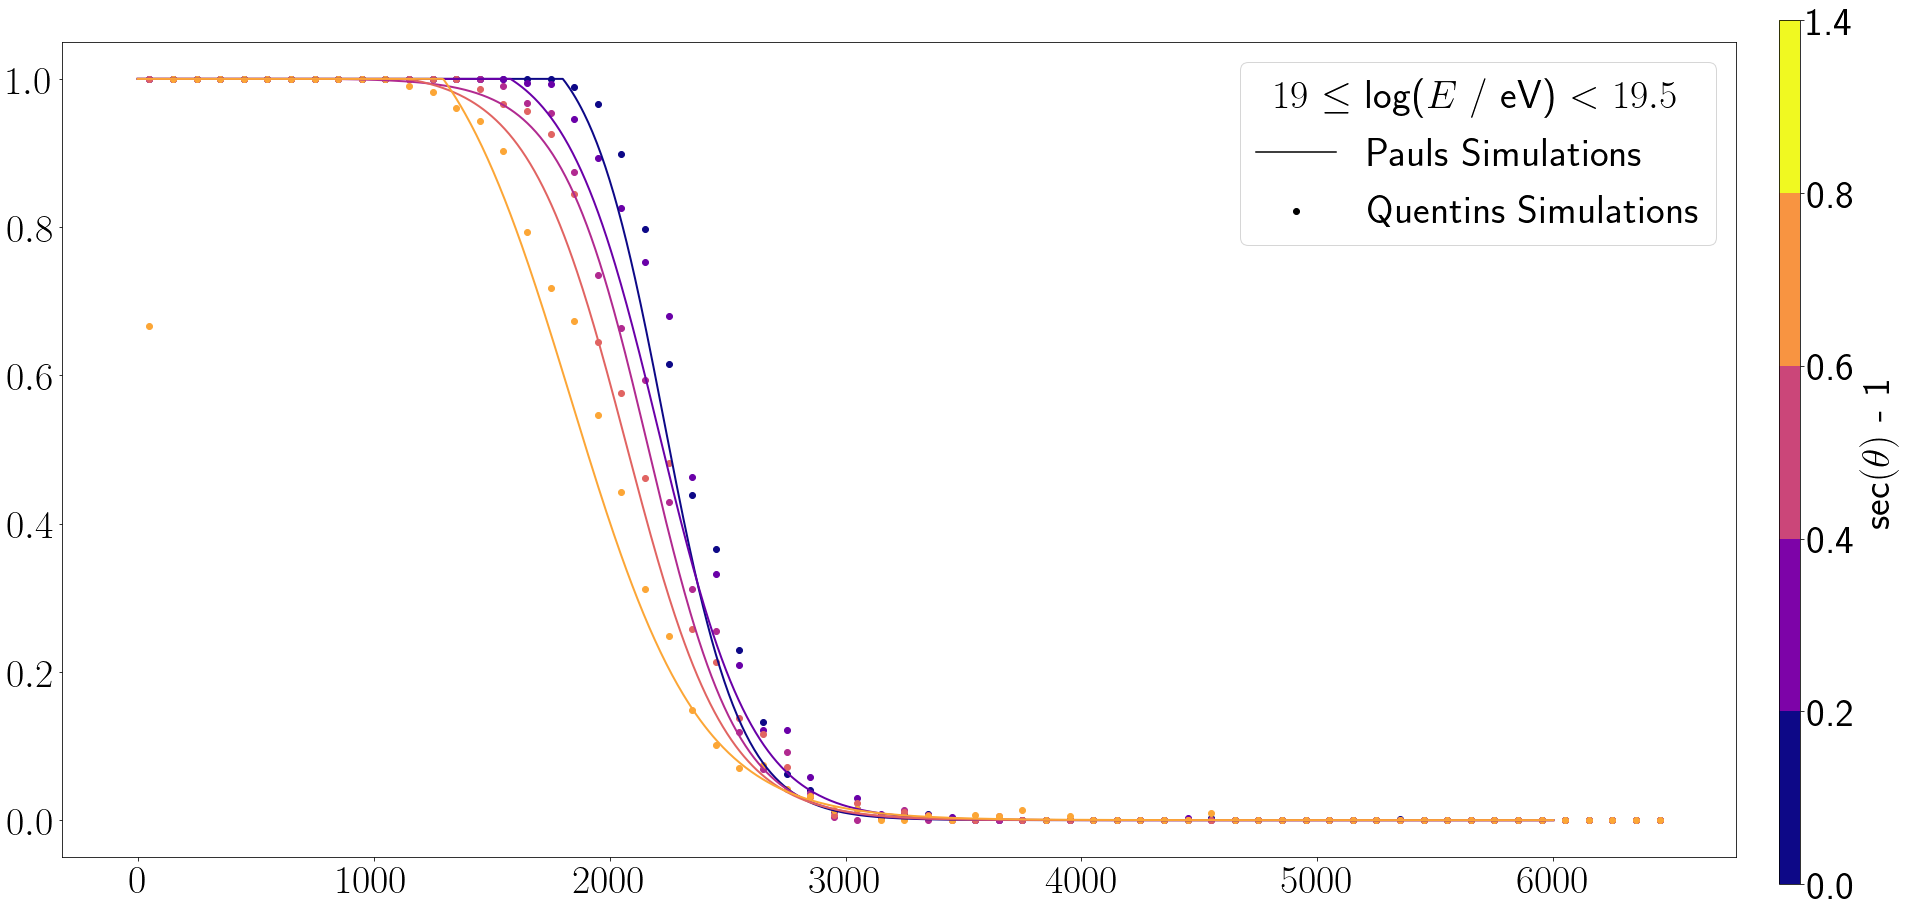

In [7]:
e_labels = [r"$16$", r"$16.5$", r"$17$", r"$17.5$", r"$18$", r"$18.5$", r"$19$", r"$19.5$"]            
annotate = lambda e : e_labels[e] + r" $\leq$ log($E$ / eV) $<$ " + e_labels[e + 1]
theta_bins =  [0.0000, 33.5600, 44.4200, 51.3200, 56.2500, 65.3700]

colormap = cmap.get_cmap("plasma")

for e in range(len(e_labels) - 1):

    if e not in [4, 5, 6]: continue

    fig = plt.figure()

    plt.plot([], [], color = "k", ls = "solid", label = "Pauls Simulations")
    plt.scatter([], [], color = "k", label = "Quentins Simulations")

    plt.legend(title = annotate(e))

    for t in range(len(theta_bins) - 1):

        c = colormap(t / (len(theta_bins) - 1))
        spd, hits, misses = np.loadtxt(f"/cr/tempdata01/filip/QGSJET-II/CROSS_CHECK/BINNED/{e_labels[e].strip('$')}_{e_labels[e+1].strip('$')}__{int(theta_bins[t])}_{int(theta_bins[t+1])}.csv", unpack = True)
        y_err = np.clip(1/(hits + misses)**2 * np.sqrt( hits**3 + misses**3 - 2 * np.sqrt((hits * misses)**3) ), 1e-5, 1)
        fitfunc_Own_LTP, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LTP/", e, t)

        upper = np.clip(y + y_err, 0, 1)
        lower = np.clip(y - y_err, 0, 1)

        x, y = spd - 50, hits / (hits + misses)

        X = np.linspace(0, 6000, 1000)

        # plt.errorbar(x, y, yerr = [y - lower, upper - y], capsize = 3, fmt = "o", elinewidth = 0.5, color = c)
        plt.scatter(x, y, color = c)
        plt.plot(X, fitfunc_Own_LTP(X), color = c, ls = "solid", lw = 2)

        # filter = [not np.isnan(item) and not np.isinf(item) for item in y]
        # popt, pcov = curve_fit(lateral_distribution_function, y[filter], x[filter], 
        #                                                     p0 = [1, 1000, 1e-6],
        #                                                     bounds = ([1, 0, 0], [np.inf, 6000, 1]),
        #                                                     sigma = x_err[filter],
        #                                                     absolute_sigma = True,
        #                                                     maxfev = 10000)

        # plt.plot(X, lateral_distribution_function(X, *popt), color = c, ls = ":", lw = 0.7)

    norm = BoundaryNorm(theta_bins, colormap.N)
    ax2 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
    cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
    cbar.set_ticks(theta_bins)
    cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

# plt.subplots_adjust(hspace = 0.04, wspace = 0)


In [ ]:
fig, axes = plt.subplots(3,3, sharex = False, sharey = True, figsize = [50, 25])
axes[-1][-1].axis("off"), axes[-1][-2].axis("off")

e_labels = [r"$16$", r"$16.5$", r"$17$", r"$17.5$", r"$18$", r"$18.5$", r"$19$", r"$19.5$"]            
annotate = lambda e : e_labels[e] + r" $\leq$ log($E$ / eV) $<$ " + e_labels[e + 1]
theta_bins =  [0.0000, 33.5600, 44.4200, 51.3200, 56.2500, 65.3700]

colormap = cmap.get_cmap("plasma")

for e in range(len(e_labels) - 1):

    ax = axes[e // 3][e % 3]

    ax.plot([], [], color = "k", ls = "solid", label = "Fitted LTP")
    ax.plot([], [], color = "k", ls = "--", label = "Offline LTP")
    ax.plot([], [], color = "k", ls = ":", label = "Offline LDF")

    ax.legend(title = annotate(e))

    for t in range(len(theta_bins) - 1):

        c = colormap(t / (len(theta_bins) - 1))
        fitfunc_Offline_LDF, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LDF/", e, t)
        fitfunc_Offline_LTP, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LTP/", e, t)
        fitfunc_Own_LTP, _     = get_fit_function("/cr/data01/filip/models/HardwareClassifier/ROC_curve/full_random_traces_downsampled_vem_1.000/", e, t)

        X = np.linspace(0, 6000, 1000)

        ax.plot(X, fitfunc_Offline_LDF(X), color = c, ls = ":", lw = 0.8)
        ax.plot(X, fitfunc_Offline_LTP(X), color = c, ls = "--", lw = 2)
        ax.plot(X, fitfunc_Own_LTP(X), color = c, ls = "solid", lw = 2)

norm = BoundaryNorm(theta_bins, colormap.N)
ax2 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks(theta_bins)
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

# plt.subplots_adjust(hspace = 0.04, wspace = 0)